In [9]:
# Juggler sequence
# a[k + 1]  =  floor(a[k] ^ 0.5)    if a[k] is even    or       
# a[k + 1]  =  floor(a[k] ^ 1.5)    if a[k] is odd
import math
        
def juggler(n):
    '''Juggler sequence'''
    a = [20, 29]
    for k in range(2, n):
        if a[k-2] % 2 == 0:
            a.append(math.floor(a[k-1]**0.5))
        else:
            a.append(math.floor(a[k-1]**1.5))
    return a

juggler(10)

[20, 29, 5, 11, 36, 216, 14, 3, 1, 1]

In [1]:
# Euler

def euler(f, y0, a, b, h=0.01):
    tn = a
    yn = y0
    while tn <= b:
        print(f"{tn:6.2f}: {yn:6.2f}")
        tn += h
        yn += h * f(tn, yn)
    return yn

def newtoncooling(time, temp):
    return -0.07 * (temp - 20)

euler(newtoncooling, 100, 0, 100, 10)

  0.00: 100.00
 10.00:  44.00
 20.00:  27.20
 30.00:  22.16
 40.00:  20.65
 50.00:  20.19
 60.00:  20.06
 70.00:  20.02
 80.00:  20.01
 90.00:  20.00
100.00:  20.00


20.0001417176

In [7]:
# factorial primes

def isprime(m):
    for i in range(2,int(m**0.5)+1):
        if m%i==0:
            return False
    return True

def fact_primes(n):
    k = 1
    f = 1
    i = 1
    res = []
    while k<n:
        i += 1
        f *= i
        if isprime(f-1) or isprime(f-1):
            res.append(f)
            k += 1
    return res

print(fact_primes(8))

[2, 6, 24, 720, 5040, 479001600, 87178291200]


In [2]:
def isprime(m):
    for i in range(2,int(m**0.5)+1):
        if m%i==0:
            return False
    return True


def motzkin(num_wanted):
    """ Return list of the first N Motzkin numbers """
    mot = [1] * (num_wanted + 1)
    for i in range(2, num_wanted + 1):
        mot[i] = (mot[i-1]*(2*i+1) + mot[i-2]*(3*i-3)) // (i + 2)
    return mot


def print_motzkin_table(N=41):
    """ Print table of first N Motzkin numbers, and note if prime """
    print(
        " n          M[n]             Prime?\n-----------------------------------")
    for i, e in enumerate(motzkin(N)):
        print(f'{i : 3}{e : 24,}', isprime(e))


print_motzkin_table()

 n          M[n]             Prime?
-----------------------------------
  0                       1 True
  1                       1 True
  2                       2 True
  3                       4 False
  4                       9 False
  5                      21 False
  6                      51 False
  7                     127 True
  8                     323 False
  9                     835 False
 10                   2,188 False
 11                   5,798 False
 12                  15,511 True
 13                  41,835 False
 14                 113,634 False
 15                 310,572 False
 16                 853,467 False
 17               2,356,779 False
 18               6,536,382 False
 19              18,199,284 False
 20              50,852,019 False
 21             142,547,559 False
 22             400,763,223 False
 23           1,129,760,415 False
 24           3,192,727,797 False
 25           9,043,402,501 False
 26          25,669,818,476 False
 27          73

In [4]:
# fusc sequence

def fusc(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    if n%2 == 0:
        return fusc(int(n/2))
    return fusc(int((n-1)/2)) + fusc(int((n+1)/2))

[fusc(n) for n in range(25)]

[0, 1, 1, 2, 1, 3, 2, 3, 1, 4, 3, 5, 2, 5, 3, 4, 1, 5, 4, 7, 3, 8, 5, 7, 2]

In [1]:
from collections import namedtuple
from pprint import pprint as pp
from math import floor

Stem = namedtuple('Stem', 'data, leafdigits')

data0 = Stem((12, 127, 28, 42, 39, 113, 42, 18, 44, 118, 44, 37, 113, 124, 37,
              48, 127, 36, 29, 31, 125, 139, 131, 115, 105, 132, 104, 123, 35,
              113, 122, 42, 117, 119, 58, 109, 23, 105, 63, 27, 44, 105, 99,
              41, 128, 121, 116, 125, 32, 61, 37, 127, 29, 113, 121, 58, 114,
              126, 53, 114, 96, 25, 109, 7, 31, 141, 46, 13, 27, 43, 117, 116,
              27, 7, 68, 40, 31, 115, 124, 42, 128, 52, 71, 118, 117, 38, 27,
              106, 33, 117, 116, 111, 40, 119, 47, 105, 57, 122, 109, 124, 115,
              43, 120, 43, 27, 27, 18, 28, 48, 125, 107, 114, 34, 133, 45, 120,
              30, 127, 31, 116, 146),
             1.0)

def stemplot(stem):
    d = []
    interval = int(10**int(stem.leafdigits))
    for data in sorted(stem.data):
        data = int(floor(data))
        stm, lf = divmod(data,interval)
        d.append( (int(stm), int(lf)) )
    stems, leafs = list(zip(*d))
    stemwidth = max(len(str(x)) for x in stems)
    leafwidth = max(len(str(x)) for x in leafs)
    laststem, out = min(stems) - 1, []
    for s,l in d:
        while laststem < s:
            laststem += 1
            out.append('\n%*i |' % ( stemwidth, laststem))
        out.append(' %0*i' % (leafwidth, l))
    out.append('\n\nKey:\n Stem multiplier: %i\n X | Y  =>  %i*X+Y\n'
               % (interval, interval))
    return ''.join(out)

if __name__ == '__main__':
    print( stemplot(data0) )


 0 | 7 7
 1 | 2 3 8 8
 2 | 3 5 7 7 7 7 7 7 8 8 9 9
 3 | 0 1 1 1 1 2 3 4 5 6 7 7 7 8 9
 4 | 0 0 1 2 2 2 2 3 3 3 4 4 4 5 6 7 8 8
 5 | 2 3 7 8 8
 6 | 1 3 8
 7 | 1
 8 |
 9 | 6 9
10 | 4 5 5 5 5 6 7 9 9 9
11 | 1 3 3 3 3 4 4 4 5 5 5 6 6 6 6 7 7 7 7 8 8 9 9
12 | 0 0 1 1 2 2 3 4 4 4 5 5 5 6 7 7 7 7 8 8
13 | 1 2 3 9
14 | 1 6

Key:
 Stem multiplier: 10
 X | Y  =>  10*X+Y



In [23]:
'''These contests consist of rounds in which each robot has a single attempt to score.
In an attempt, a robot speeds down the running track (modeled as the numberline) from 0,
the starting line, to 1, the takeoff point. A robot moves along this track by drawing a real
number uniformly from [0,1] and adding it to the robot’s current position. After each of these
advances, the robot must decide whether to jump or wait. If a robot crosses the takeoff point (at 1)
before jumping its attempt receives a score of 0. If the robot jumps before crossing 1, it draws one
final real number from [0,1] and adds it to its current position, and this final sum is the score of the attempt.

In a head-to-head contest, the two robots each have a single attempt without knowing the other’s result.
In the case that they tie (typically because they both scored 0), that round is discarded and a new round begins.
As soon as one robot scores higher than the other on the same round, that robot is declared the winner!

Assume both robots are programmed to optimize their probability of winning and are aware of each other’s strategies.
You are just sitting down to watch a match’s very first attempt (of the first round, which may or may not end up
being discarded). What is the probability that this attempt scores 0? Give this probability as a decimal
rounded to 9 digits past the decimal point.'''
import random

def new_robot_pos():
    return random.uniform(0, 1)

def robot_jumps(n):
    position = 0
    for i in range(n):
        position += new_robot_pos()
    return position

def robot_statistics(n, ntrials=100000):
    result = [0 for i in range(n)]
    scores = [0 for i in range(n)]
    score0 = [0 for i in range(n)]
    for t in range(ntrials):
        for idx, pos_val in enumerate([robot_jumps(i+1) for i in range(n)]):
            result[idx] += pos_val
            if pos_val > 1:
                scores[idx] += 0
                score0[idx] += 1
            else:
                scores[idx] += pos_val + new_robot_pos()  # one more jump value added to score
    return [result[i]/ntrials for i in range(n)], [scores[i]/ntrials for i in range(n)], score0

rs = robot_statistics(4)
print(f"positions: {rs[0]}")
print(f"scores: {rs[1]}")
print(f"score 0: {rs[2]}")

positions: [0.4997355113696723, 0.9982172075250019, 1.5023699187587392, 1.9978240139282306]
scores: [0.9997942018346196, 0.5830684712495051, 0.208096910353518, 0.056203246725431574]
score 0: [0, 49865, 83334, 95707]


In [2]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, drift=np.array([[0], [0]]), out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process) with drift D:

        X(t) = X(0) + N(0, delta**2 * t; 0, t) + D

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent. D is the constant drift.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt) + D

    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    drift : float or numpy array
        the directional drift (this will not be normalized so ensure approriate values)
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
    
    # consider drift
    r += drift

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

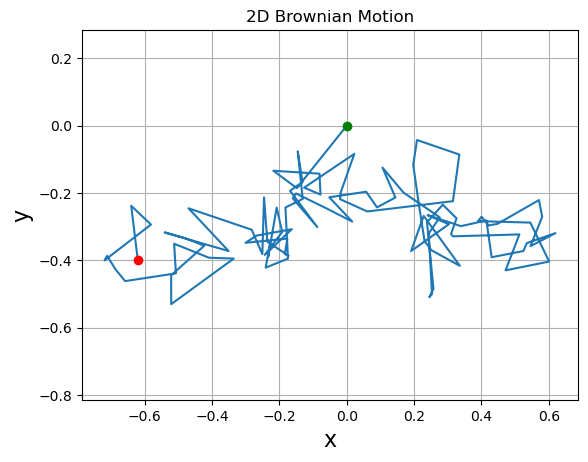

In [33]:
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter
delta = 0.25
# Total time
T = 10.0
# Number of steps
N = 100
# Time step size
dt = T/N
# Initial values of x
x = numpy.empty((2,N+1))
x[:, 0] = 0.0  # set starting point to 0, 0

brownian(x[:,0], N, dt, delta, np.array([[-0.02], [0]]), out=x[:,1:])

# Plot the 2D trajectory
plot(x[0],x[1])

# Mark the start and end points
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()

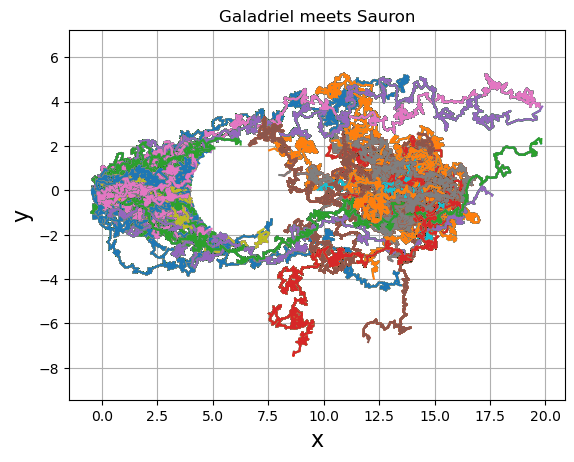

0.0


In [63]:
# simulate Galadriel and Sauron meeting at sea
# precalc paths, Galadriel west with east-drift, Sauron east with minimal drift
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title

def dist(x0, y0, x1, y1):
    return np.sqrt((x0-x1)**2 + (y0-y1)**2)

delta = 0.1 # 1 unit = 10 km, 2600 km E to W (Valinor-Numenor 800km, Numenor r=200km, Numenor-ME 1200km)
T = 800.0  # 800 hours
N = 800
dt = T/N  # one hour
score = 0  # score couter: G+S meet
n_experiments = 120

for k in range(n_experiments):
    gal = numpy.empty((2, N+1))
    gal[:, 0] = 0.0  # set starting point to 0, 0
    sau = numpy.empty((2, N+1))
    sau[:, 0] = (15.0, 0)  # set starting point to 20, 0 (assume wreck somewhere between ME and Numenor)

    brownian(gal[:,0], N, dt, delta, np.array([[0.026], [0]]), out=gal[:,1:])  # Gal has a significant east-drift
    brownian(sau[:,0], N, dt, delta, np.array([[-0.01], [0]]), out=sau[:,1:])  # Sau has a mild west-drift

    for ig in range(N):
        #print(gal[0, ig], gal[1, ig])
        if gal[0, ig] < -0.5 or gal[0, ig] > 20:  # Gal at Valinor or ME
            break
        if sau[0, ig] < -0.5 or sau[0, ig] > 20:  # Sau at Valinor or ME
            break
        if dist(gal[0, ig], gal[1, ig], 6., 0.) < 2.:  # Gal at Numenor
            break
        if dist(sau[0, ig], sau[1, ig], 6., 0.) < 2.:  # Sau at Numenor
            break
        if dist(gal[0, ig], gal[1, ig], sau[0, ig], sau[1, ig]) < 0.1:  # meet?
            score += 1
            break    
        plot(gal[0, :ig],gal[1, :ig])
        plot(sau[0, :ig],sau[1, :ig])

# More plot decorations
title('Galadriel meets Sauron')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()

print(score/n_experiments)

In [64]:
# simulate Galadriel and Sauron meeting at sea
# precalc paths, Galadriel west with east-drift, Sauron east with minimal drift
import numpy

def dist(x0, y0, x1, y1):
    return np.sqrt((x0-x1)**2 + (y0-y1)**2)

delta = 0.1 # 1 unit = 10 km, 2600 km E to W (Valinor-Numenor 800km, Numenor r=200km, Numenor-ME 1200km)
T = 800.0  # 800 hours = 40 days, 20 hours each
N = 800
dt = T/N  # one hour
score = 0  # score couter: G+S meet
n_experiments = 1000000

for k in range(n_experiments):
    gal = numpy.empty((2, N+1))
    gal[:, 0] = 0.0  # set starting point to 0, 0
    sau = numpy.empty((2, N+1))
    sau[:, 0] = (15.0, 0)  # set starting point to 20, 0 (assume wreck somewhere between ME and Numenor)

    brownian(gal[:,0], N, dt, delta, np.array([[0.026], [0]]), out=gal[:,1:])  # Gal has a significant east-drift
    brownian(sau[:,0], N, dt, delta, np.array([[-0.01], [0]]), out=sau[:,1:])  # Sau has a mild west-drift

    for ig in range(N):
        #print(gal[0, ig], gal[1, ig])
        if gal[0, ig] < -0.5 or gal[0, ig] > 20:  # Gal at Valinor or ME
            break
        if sau[0, ig] < -0.5 or sau[0, ig] > 20:  # Sau at Valinor or ME
            break
        if dist(gal[0, ig], gal[1, ig], 6., 0.) < 2.:  # Gal at Numenor
            break
        if dist(sau[0, ig], sau[1, ig], 6., 0.) < 2.:  # Sau at Numenor
            break
        if dist(gal[0, ig], gal[1, ig], sau[0, ig], sau[1, ig]) < 0.1:  # meet?
            score += 1
            break    

print(score/n_experiments)

0.002238


In [4]:
# Babbage problem

n = 10000
while not n**2 % 1000000 == 269696:
    n += 1
    
print(n)

25264


In [1]:
# two rectangles
import math

def cc(a, b):
    sq = (a+b)**2-32*a*b
    if sq > 0:
        return (((a+b) + math.sqrt(sq)) / 4, ((a+b) + math.sqrt(sq)) / 4)
    return (1, 1)

for a in range(1, 50):
    for b in range(a, 60):
        c = cc(a, b)
        if c[0] > 1:
            d = 2*a*b/c[0]
            print(a, b, c[0], d, a+b, 2*(c[0]+d), 2*a*b, c[0]*d)

1 30 8.0 7.5 31 31.0 60 60.0
1 31 9.414213562373096 6.585786437626904 32 32.0 62 62.0
1 32 10.265564437074637 6.234435562925363 33 33.0 64 64.0
1 33 11.0 6.0 34 34.0 66 66.0
1 34 11.676174977679906 5.823825022320094 35 35.0 68 68.0
1 35 12.3166247903554 5.6833752096446 36 36.0 70 70.0
1 36 12.932729965664059 5.567270034335941 37 37.0 72 72.0
1 37 13.531128874149275 5.468871125850725 38 38.0 74 74.0
1 38 14.116062299143245 5.383937700856755 39 39.0 76 76.0
1 39 14.69041575982343 5.30958424017657 40 40.0 78 78.0
1 40 15.256246098625198 5.243753901374803 41 41.0 80 80.0
1 41 15.815072906367325 5.184927093632675 42 42.0 82 82.0
1 42 16.368051263561057 5.131948736438942 43 43.0 84 84.0
1 43 16.916079783099615 5.083920216900384 44 44.0 86 86.0
1 44 17.45987117418711 5.040128825812889 45 45.0 88 88.0
1 45 18.0 5.0 46 46.0 90 90.0
1 46 18.536935980249112 4.963064019750886 47 47.0 92 92.0
1 47 19.071067811865476 4.9289321881345245 48 48.0 94 94.0
1 48 19.60272058492637 4.897279415073629 49 49.0

In [2]:
import numpy as np

print(np.dot([1,  3, -5], [4, -2, -1]))

3


In [1]:
# modular inverse

def modularinverse(a, m):
    x = m // a
    while (a*x) % m != 1:
        if x > m:
            return -1
        x += 1
    return x

print(modularinverse(42, 2017))
print(modularinverse(12, 144))

1969
-1


In [2]:
# narcissistic decimals
def narcissistic(n):
    m = len(str(n))
    return n == sum([int(d)**m for d in str(n)])

#print(narcissistic(153))
nd = 0
k = 0
while nd < 25:
    k += 1
    if narcissistic(k):
        print(k)
        nd += 1

1
2
3
4
5
6
7
8
9
153
370
371
407
1634
8208
9474
54748
92727
93084
548834
1741725
4210818
9800817
9926315
24678050


In [3]:
#def Y(f):
#    (lambda x: f(x(x)))(lambda x: f(x(x)))
    
Y = lambda f: (lambda x: x(x))(lambda y: f(lambda *args: y(y)(*args)))
fac = lambda f: lambda n: (1 if n<2 else n*f(n-1))
print([ Y(fac)(i) for i in range(10) ])

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


In [4]:
from __future__ import division
import math
import sys

def fivenum(array):
    n = len(array)
    if n == 0:
        print("you entered an empty array.")
        sys.exit()
    x = sorted(array)
    
    n4 = math.floor((n+3.0)/2.0)/2.0
    d = [1, n4, (n+1)/2, n+1-n4, n]
    sum_array = []
    
    for e in range(5):
        floor = int(math.floor(d[e] - 1))
        ceil = int(math.ceil(d[e] - 1))
        sum_array.append(0.5 * (x[floor] + x[ceil]))
    
    return sum_array

x = [0.14082834, 0.09748790, 1.73131507, 0.87636009, -1.95059594, 0.73438555, -0.03035726, 1.46675970,
-0.74621349, -0.72588772, 0.63905160, 0.61501527, -0.98983780, -1.00447874, -0.62759469, 0.66206163,
1.04312009, -0.10305385, 0.75775634, 0.32566578]

y = fivenum(x)
print(y)

[-1.95059594, -0.676741205, 0.23324706, 0.746070945, 1.73131507]


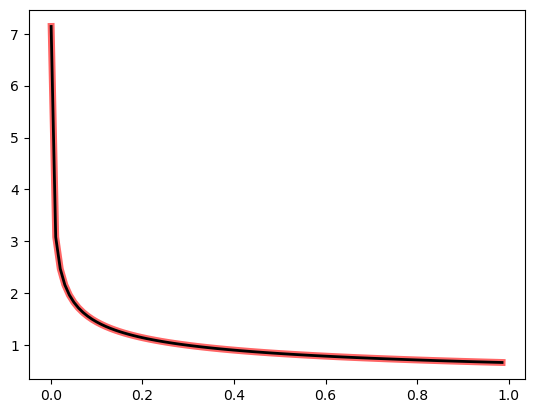

In [1]:
import numpy as np
from scipy.stats import powerlaw
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
a = 0.659
mean, var, skew, kurt = powerlaw.stats(a, moments='mvsk')
x = np.linspace(powerlaw.ppf(0.01, a),
                powerlaw.ppf(0.99, a), 100)
ax.plot(x, powerlaw.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='powerlaw pdf')
rv = powerlaw(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.show()

In [1]:
# p-value
import numpy as np

# size of difference
# size of dataset
# variance within group

N = 500

def generate_twosamples(diff, nsize, sigma):
    sample0 = np.random.normal(0, sigma, nsize)
    sample1 = np.random.normal(diff, sigma, nsize)
    return (sample0, sample1)

s = generate_twosamples(3, N, 1)

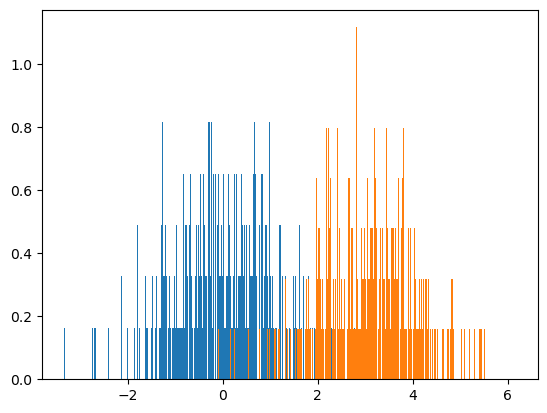

In [2]:
import matplotlib.pyplot as plt

plt.hist(s[0], N, density=True)
plt.hist(s[1], N, density=True)
plt.show()

In [3]:
from functools import reduce
from operator import mul

def mfac(n, m): return reduce(mul, range(n, 0, -m))

for m in range(1, 11): print("%2i: %r" % (m, [mfac(n, m) for n in range(1, 11)]))
    

 1: [1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]
 2: [1, 2, 3, 8, 15, 48, 105, 384, 945, 3840]
 3: [1, 2, 3, 4, 10, 18, 28, 80, 162, 280]
 4: [1, 2, 3, 4, 5, 12, 21, 32, 45, 120]
 5: [1, 2, 3, 4, 5, 6, 14, 24, 36, 50]
 6: [1, 2, 3, 4, 5, 6, 7, 16, 27, 40]
 7: [1, 2, 3, 4, 5, 6, 7, 8, 18, 30]
 8: [1, 2, 3, 4, 5, 6, 7, 8, 9, 20]
 9: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [1]:
import math

def arithgeommean(a0, g0, tolerance=0.000001):
    an = (a0 + g0) / 2
    gn = math.sqrt(a0 * g0)
    while abs(an - gn) > tolerance:
        an, gn = (an + gn) / 2, math.sqrt(an * gn)
    return an, gn

print(arithgeommean(2, 4))

(2.9135820963085175, 2.91358202787911)


In [1]:
# comma quibbling

def comquib(s):
    if len(s) < 1:
        return "{}"
    res = ", ".join(s[:-1])
    if len(s) > 1:
        return "{" + res + " and " + s[-1] + "}"
    return "{" + res + s[-1] + "}"

print(comquib(["ABC", "DEF", "G", "H"]))
print(comquib(["ABC", "DEF"]))
print(comquib([]))

{ABC, DEF, G and H}
{ABC and DEF}
{}


In [1]:
# pseudo random middle-square

def random(seed=675248):
    s = str(seed * seed)
    while not len(s) == 12:
        s = "0" + s
    return int(s[4:10])

random()

598615

In [1]:
import math
print([n + math.floor(1/2 + math.sqrt(n)) for n in range(25)])
print([n - math.floor(1/2 + math.sqrt(n)) for n in range(25)])

[0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29]
[0, 0, 1, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18, 19]


In [1]:
def isprime(m):
    for i in range(2,int(m**0.5)+1):
        if m%i==0:
            return False
    return True

def wagstaff(N):
    """ find first N Wagstaff primes """
    pri, wcount = 1, 0
    while wcount < N:
        pri += 2
        if isprime(pri):
            wag = (2**pri + 1) // 3
            if isprime(wag):
                wcount += 1
                print(f'{wcount: 3}: {pri: 5} => ', 
                      f'{wag:,}' if wcount < 11 else f'[{len(str(wag))} digit number]')

wagstaff(10)

  1:     3 =>  3
  2:     5 =>  11
  3:     7 =>  43
  4:    11 =>  683
  5:    13 =>  2,731
  6:    17 =>  43,691
  7:    19 =>  174,763
  8:    23 =>  2,796,203
  9:    31 =>  715,827,883
 10:    43 =>  2,932,031,007,403


In [2]:
str(int('123') + 1)

'124'

In [3]:
a = 1
b = 3
a, b = b, a
print(a, b)

3 1


In [1]:

def leonardo(n):
    ln = [1, 1]
    for l in range(2, n):
        ln.append(ln[l-2] + ln[l-1] + 1)
    return ln
        
list(leonardo(10))

[1, 1, 3, 5, 9, 15, 25, 41, 67, 109]

In [2]:
import sys

def calcPi():
    q, r, t, k, n, l = 1, 0, 1, 1, 3, 3
    while True:
        if 4*q+r-t < n*t:
            yield n
            nr = 10*(r-n*t)
            n  = ((10*(3*q+r))//t)-10*n
            q  *= 10
            r  = nr
        else:
            nr = (2*q+r)*l
            nn = (q*(7*k)+2+(r*l))//(t*l)
            q  *= k
            t  *= l
            l  += 2
            k += 1
            n  = nn
            r  = nr

name = input('enter your name:')
dname = ''.join([str(ord(c)) for c in name])

pi_len = 80000
pi_digits = calcPi()
i = 0
i_position = 0
current_pi = ''
for d in pi_digits:
    #sys.stdout.write(str(d))
    if len(current_pi) < len(dname):
        current_pi += str(d)
    else:
        if current_pi == dname:
            print()
            print(f"position: {i - len(dname)}")
            print(dname, current_pi)
            break
        else:
            current_pi = current_pi[1:] + str(d)
    i += 1
    if i == pi_len: break

enter your name:ab

position: 4632
9798 9798


In [13]:
a=5333
b=12
print(a//b, a%b)

444 5


In [1]:
import math

def propdiv(n):
    return [k for k in range(1, int(n/2)+1) if n%k == 0]

def prodpropdiv(n):
    pd = propdiv(n)
    res = 1
    for el in pd[1:]:
        res *= el
    return res

#print(f"prop div {propdiv(24)} {prodpropdiv(24)} {int(prodpropdiv(24)**(1/3) + 1)}")

def cubrootspd(n):
    res = []
    for i in range(1,n):
        if int(prodpropdiv(i)**(1/3) + 1) == i:
            res.append(i)
    return res

print(f"{cubrootspd(500)}")

[2, 24, 30, 40, 42, 54, 56, 66, 70, 78, 88, 102, 104, 105, 110, 114, 128, 130, 135, 136, 138, 152, 154, 165, 170, 174, 182, 184, 186, 189, 190, 195, 222, 230, 231, 232, 238, 246, 248, 250, 255, 258, 266, 273, 282, 285, 286, 290, 296, 297, 310, 318, 322, 328, 344, 345, 351, 354, 357, 366, 370, 374, 375, 376, 385, 399, 402, 406, 410, 418, 424, 426, 429, 430, 434, 435, 438, 442, 455, 459, 465, 470, 472, 474, 483, 488, 494, 498]


In [3]:

def isprime(m):
    for i in range(2,int(m**0.5)+1):
        if m%i==0:
            return False
    return True

def factprime(n):
    cp = 1
    res = []
    for i in range(1,n):
        cp *= i
        if isprime(cp-1) or isprime(cp+1):
            res.append(cp)
    return res

print(f"{factprime(10)}")

[1, 2, 6, 24, 720, 5040]


In [12]:

def sumifodd(l):
    return sum([l[i][1] for i in range(len(l)) if l[i][0]%2==1])

def ethiopmult(a,b):
    res = 0
    while a > 0:
        if a%2==1: res += b
        a, b = int(a/2), 2*b
    return res

ethiopmult(17, 34)

578

In [1]:

from math import gcd

def  φ(n):
    return sum(1 for k in range(1, n + 1) if gcd(n, k) == 1)

if __name__ == '__main__':
    def is_prime(n):
        return φ(n) == n - 1
    
    for n in range(1, 26):
        print(f" φ({n}) == {φ(n)}{', is prime' if is_prime(n)  else ''}")
    count = 0
    for n in range(1, 10_000 + 1):
        count += is_prime(n)
        if n in {100, 1000, 10_000}:
            print(f"Primes up to {n}: {count}")
            

 φ(1) == 1
 φ(2) == 1, is prime
 φ(3) == 2, is prime
 φ(4) == 2
 φ(5) == 4, is prime
 φ(6) == 2
 φ(7) == 6, is prime
 φ(8) == 4
 φ(9) == 6
 φ(10) == 4
 φ(11) == 10, is prime
 φ(12) == 4
 φ(13) == 12, is prime
 φ(14) == 6
 φ(15) == 8
 φ(16) == 8
 φ(17) == 16, is prime
 φ(18) == 6
 φ(19) == 18, is prime
 φ(20) == 8
 φ(21) == 12
 φ(22) == 10
 φ(23) == 22, is prime
 φ(24) == 8
 φ(25) == 20
Primes up to 100: 25
Primes up to 1000: 168
Primes up to 10000: 1229


In [2]:
[1/n for n in range(1,8)]

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285]

In [3]:
import math

def gamma(n):
    g = 0
    for i in range(1, n+1): 
        g += 1 / i
    g -= math.log(n) + 1 / (2*n)
    return g

print(f"{gamma(100)}");


0.5772073316515289


In [4]:
def hanoi(ndisks, startPeg=1, endPeg=3):
    if ndisks:
        hanoi(ndisks-1, startPeg, 6-startPeg-endPeg)
        print(f"Move disk {ndisks} from peg {startPeg} to peg {endPeg}")
        hanoi(ndisks-1, 6-startPeg-endPeg, endPeg)

hanoi(4)

Move disk 1 from peg 1 to peg 2
Move disk 2 from peg 1 to peg 3
Move disk 1 from peg 2 to peg 3
Move disk 3 from peg 1 to peg 2
Move disk 1 from peg 3 to peg 1
Move disk 2 from peg 3 to peg 2
Move disk 1 from peg 1 to peg 2
Move disk 4 from peg 1 to peg 3
Move disk 1 from peg 2 to peg 3
Move disk 2 from peg 2 to peg 1
Move disk 1 from peg 3 to peg 1
Move disk 3 from peg 2 to peg 3
Move disk 1 from peg 1 to peg 2
Move disk 2 from peg 1 to peg 3
Move disk 1 from peg 2 to peg 3


In [1]:
import math

def harmapprox(n):
    return (1 - (n-1)*(n-1)/2/(n*n) - (n-1)**3/6/(n*n*n)) / 3

[1/i - harmapprox(i) for i in range(1,15)]

[0.6666666666666667,
 0.2152777777777778,
 0.09053497942386829,
 0.03385416666666666,
 0.0017777777777778225,
 -0.018775720164609044,
 -0.03304178814382899,
 -0.04351128472222221,
 -0.05151653711324494,
 -0.05783333333333332,
 -0.06294348443108777,
 -0.06716177983539097,
 -0.070702473069337,
 -0.07371639131843213]

In [2]:
import queue

pq = queue.PriorityQueue()
for item in ((3, "Clear drains"), (4, "Feed cat"), (5, "Make tea"), (1, "Solve RC tasks"), (2, "Tax return")):
    pq.put(item)

while not pq.empty():
    print(pq.get_nowait())

(1, 'Solve RC tasks')
(2, 'Tax return')
(3, 'Clear drains')
(4, 'Feed cat')
(5, 'Make tea')


In [6]:

def power_mod(b, e, m):
    " Without using builtin function "
    x = 1
    while e > 0:
        b, e, x = (
            b * b % m,
            e // 2,
            b * x % m if e % 2 else x
        )
    return x


a = 2988348162058574136915891421498819466320163312926952423791023078876139
b = 2351399303373464486466122544523690094744975233415544072992656881240319
m = 10 ** 40
print(power_mod(a, b, m))

def chckmod(a,b,m):
    return (a*b)%m - ((a%m)*(b%m))%m

print(chckmod(5,7,3))
print(chckmod(122,431,7))
print(chckmod(766,543,12))

1527229998585248450016808958343740453059
0
0
0
